In [9]:
import numpy as np

In [10]:
# Problem 3C

'''
Least Squares Regression Problem with Positive Parameter

Input:
A: NumPy Array (Dimensions: m x n)
b: NumPy Array (Dimensions: m x 1)
lamb: Float (greater than or equal to 0)
'''
def LSRL(A, b, lamb):
    # Convert matrix A to type float
    A = np.array(A, dtype = float)
    
    # Get the dimensions of A
    m,n = A.shape
    
    # Get parameter identity matrix to concat to the bottom of A
    I = np.eye(n,n) * np.sqrt(lamb)
    
    # Join A and I to get the A1 matrix of dim: m+n x n
    A1 = np.concatenate((A, I), axis = 0)
    
    # Get b1 array by adding n zeros to the back
    b1 = np.concatenate((b, np.zeros(n)))
    
    '''
    Now that we have A1 and b1, we can simply use a Least Squares solver 
    to compute the result
    '''
    
    x = np.linalg.lstsq(A1, b1, rcond = None)

    return x[0]

In [11]:
# Test to see that the LSRL function works
mat = np.array([[1,2,3],
                [1,3,3],
                [1,4,3],
                [1,2,4]])
b = np.array([1,2,3,4])

x = LSRL(mat, b, 1)

print("Solution of Least Squares Problem:", x)

Solution of Least Squares Problem: [-0.13559322  0.16949153  0.6779661 ]


In [12]:
# Problem 4A

import pandas as pd

# Read in the data
A = pd.read_csv("A.csv", header = None)
b = pd.read_csv("b.csv", header = None)

'''Rescale columns of A to each have unit norm'''
# First get the transpose of the dataframe because sklearn normalize
# transforms the rows
A_T = A.T

from sklearn.preprocessing import normalize
A_T_n = normalize(A_T, norm = "l2")

# Tranpose again to get original dimensions
A_n = A_T_n.T

# Create a dataframe again
A_n_df = pd.DataFrame(A_n)

# Verify that the columns are unit norms
def unitnorm(A_n_df):
    for i in range(A_n_df.shape[1]):
        tf = (np.isclose(pd.Series(A_n_df[i]**2).sum(),1))
        if tf == False:
            return False
    return True

unitnorm(A_n_df)

True

In [13]:
# Unit norm A
A_n_df

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.049726,0.095718,-0.026483,0.039321,0.026200,-0.008208,-0.067922,0.037006,0.057468,0.047206
1,0.208514,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.072841,0.011907,-0.089892,-0.041491,-0.006758,0.045131,-0.022635,0.003106,0.097086,0.047206
2,0.000000,0.208514,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.020897,-0.075960,-0.116622,-0.045779,0.036517,0.064498,-0.020818,-0.028702,0.072054,0.059588
3,0.000000,0.000000,0.208514,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.052074,-0.066889,-0.113469,-0.014629,0.078606,0.019076,-0.035402,-0.035662,0.059753,0.055755
4,0.000000,0.000000,0.000000,0.208514,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.013860,0.010520,-0.026913,0.037844,0.010102,-0.060904,0.023109,-0.064130,0.076207,0.052688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.208514,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.064302,0.024998,-0.028042,-0.061720,-0.039517,-0.038158,0.027028,-0.083262,-0.121198,0.010910
266,0.000000,0.208514,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.001115,-0.048023,-0.079837,0.085536,0.002755,0.028556,0.076287,0.051888,-0.023323,0.010030
267,0.000000,0.000000,0.208514,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000825,-0.076566,0.154441,0.095385,0.036787,0.058526,-0.042626,-0.010508,-0.002161,0.061649
268,0.000000,0.000000,0.000000,0.208514,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.042593,0.064125,0.035745,0.074300,-0.097413,-0.062299,0.005148,0.103071,0.054960,0.048706


In [14]:
# Problem 4B

# Split the dataframes into training and test data sets
A_train = A_n_df.loc[0:199,:]
A_test = A_n_df.loc[200:,:]
b_train = b.loc[0:199,:]
b_test = b.loc[200:,:]

# Convert to NumPy Array
A_train = np.array(A_train)
A_test = np.array(A_test)
b_train = np.array(b_train)
b_test = np.array(b_test).T

b_train = np.ndarray.flatten(b_train)
b_test = np.ndarray.flatten(b_test)

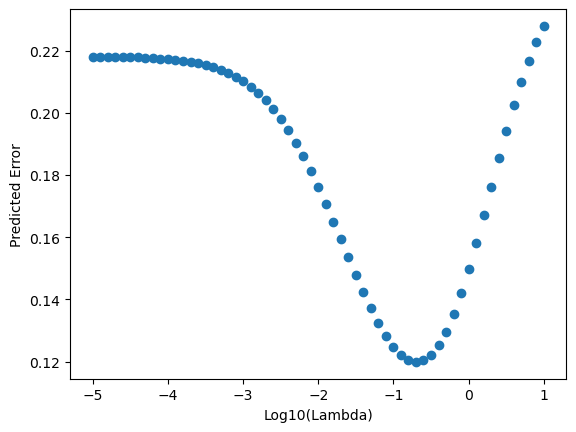

In [15]:
# Problem 4C and 4D

errors = []
lambs = []

# 4C
for alpha in range(-50,11):
    alpha /= 10.0
    lamb = np.power(10, alpha)
    lambs.append(alpha)
    
    x = LSRL(A_train, b_train, lamb)
    v = b_test - A_test @ x
    m = np.linalg.norm(v)
    PE = m * m / 70.0
    
    errors.append(PE)

# 4D

import matplotlib.pyplot as plt

plt.scatter(lambs,errors)
plt.xlabel("Log10(Lambda)")
plt.ylabel("Predicted Error")
plt.show()

In [16]:
# Problem 4E

bestPE = pd.Series(errors).min()

# Error for lambda = 0 

x = LSRL(A_train, b_train, 0)
v = b_test - A_test @ x
m = np.linalg.norm(v)
PE = m * m / 70.0

print("Best Prediction Error:", bestPE)
print("Linear Regression Error:", PE)
print("\nThe best prediction error is far lower than the prediction error of linear regression\n"+
      "This makes sense given the graph above and how the smallest lambda values had an error of around 0.22")

Best Prediction Error: 0.11987023734206889
Linear Regression Error: 0.21822922828530064

The best prediction error is far lower than the prediction error of linear regression
This makes sense given the graph above and how the smallest lambda values had an error of around 0.22
